# Example 3

In [1]:
from CircuitCalculator.SimpleCircuit.styles.styling import select
select(style='DIN')
from CircuitCalculator.SimpleCircuit.Elements import Schematic, Resistor, Line, Ground, RealCurrentSource, LabeledLine
from CircuitCalculator.SimpleCircuit.DiagramSolution import real_network_dc_solution
from CircuitCalculator.Network.NodalAnalysis import nodal_analysis_solver

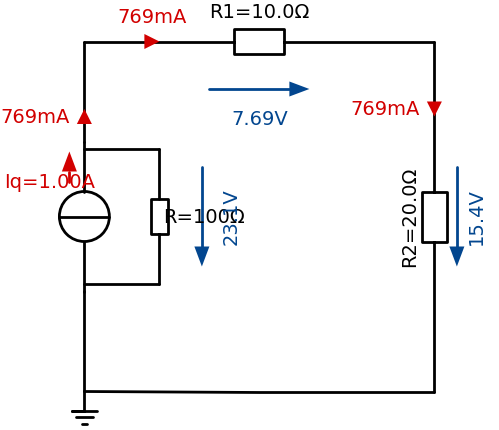

In [2]:
with Schematic() as schematic:
    schematic += (I:=RealCurrentSource(name='Iq', I=1, R=100).up())
    schematic += LabeledLine(name='linS').up().at(I.end).length((schematic.unit-3)/2)
    schematic += (R1:=Resistor(R=10, name='R1')).right()
    schematic += Resistor(R=20, name='R2').down()
    schematic += Line().left()
    schematic += Ground()
    schematic += Line().up().length((schematic.unit-3)/2)
    schemdraw_solution = real_network_dc_solution(schematic=schematic, solver=nodal_analysis_solver)
    schematic += schemdraw_solution.draw_voltage('R1')
    schematic += schemdraw_solution.draw_current('R1')
    schematic += schemdraw_solution.draw_voltage('R2', reverse=False)
    schematic += schemdraw_solution.draw_current('R2')
    schematic += schemdraw_solution.draw_voltage('Iq', reverse=True)
    schematic += schemdraw_solution.draw_current('linS')